### IMPORT DEPENDENCIES

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from PIL import Image 
from sklearn.model_selection import train_test_split


# Working with Images

In [6]:
with_mask_files = os.listdir('C:\\Users\\HP\\Videos\\DEEP_LEARNING\\facemask\\data\\with_mask')
#store all files in with_mask as list
print(with_mask_files[0:5])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']


In [7]:
without_mask_files = os.listdir('C:\\Users\\HP\\Videos\\DEEP_LEARNING\\facemask\\data\\without_mask')
print(without_mask_files[0:5])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']


In [8]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


## Creating Labels

### With_mask=1
### Without_mask=0

In [9]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [10]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


# Display Images

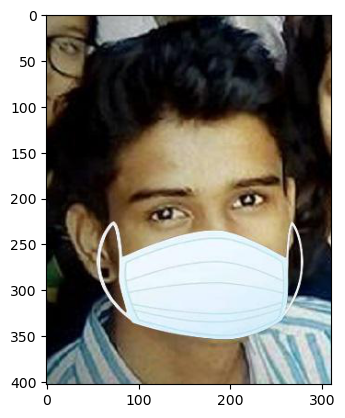

In [14]:
# displaying with mask image
img = mpimg.imread('C:\\Users\\HP\\Videos\\DEEP_LEARNING\\facemask\\data\\with_mask\\with_mask_1000.jpg')#read image as numpy and then shoow
imgplot = plt.imshow(img)
plt.show()

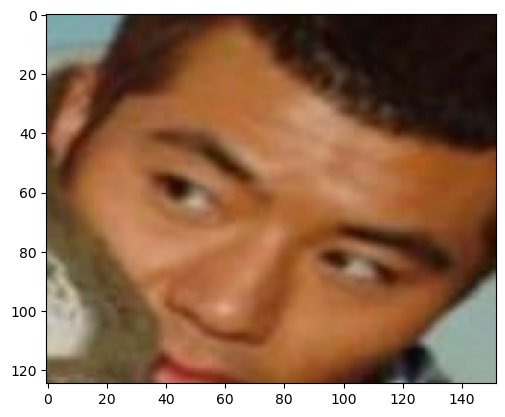

In [15]:
# displaying without mask image
img = mpimg.imread('C:\\Users\\HP\\Videos\\DEEP_LEARNING\\facemask\\data\\without_mask\\without_mask_1001.jpg')
imgplot = plt.imshow(img)
plt.show()

## Preprocessing of Images 

### 1) RESIZE IMAGES
### 2) CONVERT TO NUMPY 

In [17]:
# convert images to numpy arrays


with_mask_path = 'C:\\Users\\HP\\Videos\\DEEP_LEARNING\\facemask\\data\\with_mask'

data = []

for img_file in with_mask_files:
    image = Image.open(os.path.join(with_mask_path, img_file))  # Use os.path.join to concatenate directory path and filename
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

without_mask_path = 'C:\\Users\\HP\\Videos\\DEEP_LEARNING\\facemask\\data\\without_mask'


for img_file in without_mask_files:
    image = Image.open(os.path.join(without_mask_path, img_file))  # Use os.path.join to concatenate directory path and filename
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)


C:\Users\HP\Documents\anaconda2\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
len(data)


7553

In [19]:
data[0]

array([[[50, 58, 31],
        [46, 54, 34],
        [56, 59, 42],
        ...,
        [26, 32, 25],
        [29, 33, 18],
        [34, 40, 16]],

       [[47, 55, 30],
        [49, 57, 37],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [38, 42, 31],
        [31, 41, 22]],

       [[52, 58, 37],
        [50, 59, 38],
        [59, 64, 36],
        ...,
        [45, 44, 30],
        [29, 35, 28],
        [20, 30, 17]],

       ...,

       [[63, 72, 37],
        [66, 76, 41],
        [74, 84, 50],
        ...,
        [ 5,  4,  0],
        [20, 19, 15],
        [17, 17, 12]],

       [[59, 71, 34],
        [60, 70, 39],
        [68, 76, 50],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 29],
        [54, 64, 37],
        [57, 63, 43],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [20, 12, 13]]], dtype=uint8)

In [30]:
data[0].shape

(128, 128, 3)

In [24]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [28]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

# BUILDING CNN

In [31]:
import tensorflow as tf
from tensorflow import keras

In [34]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)




Epoch 1/5


170/170 [==============================] - 36s 190ms/step - loss: 0.4703 - acc: 0.8129 - val_loss: 0.2802 - val_acc: 0.8810
Epoch 2/5
170/170 [==============================] - 31s 183ms/step - loss: 0.3102 - acc: 0.8757 - val_loss: 0.2505 - val_acc: 0.9058
Epoch 3/5
170/170 [==============================] - 31s 185ms/step - loss: 0.2527 - acc: 0.9014 - val_loss: 0.2165 - val_acc: 0.9223
Epoch 4/5
170/170 [==============================] - 31s 180ms/step - loss: 0.2215 - acc: 0.9145 - val_loss: 0.2094 - val_acc: 0.9306
Epoch 5/5
170/170 [==============================] - 31s 181ms/step - loss: 0.1834 - acc: 0.9283 - val_loss: 0.2245 - val_acc: 0.9306


## Evaluation

In [35]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 2s 46ms/step - loss: 0.2175 - acc: 0.9087
Test Accuracy = 0.9086697697639465
